In [181]:
# Car Prediction project 

In [258]:
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
from sklearn import metrics

In [259]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [260]:
df.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1  

In [263]:
# encoding the categorical data 

In [264]:
df.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}},inplace=True)
df.replace({'Seller_Type':{'Dealer':0, 'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)

In [265]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [266]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [267]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [268]:
# seperate x and y ( present price)

In [365]:
x= df.drop(columns=['Car_Name','Selling_Price'],axis=1)
y=df[['Selling_Price']]

In [270]:
x.head()

,Car_Name,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,ritz,27000,0,0,0
1,sx4,43000,1,0,0
2,ciaz,6900,0,0,0
3,wagon r,5200,0,0,0
4,swift,42450,1,0,0


In [271]:
y.head()

,Present_Price
0,5.59
1,9.54
2,9.85
3,4.15
4,6.87


In [367]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1, random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [369]:
lr = LinearRegression()
lr_model= lr.fit(xtrain, ytrain)


In [371]:
data_pred= lr_model.predict(xtrain)

In [373]:
from sklearn import metrics
error_score=metrics.r2_score(ytrain, data_pred)
print("r score errror:" , error_score)

r score errror: 0.8799451660493699


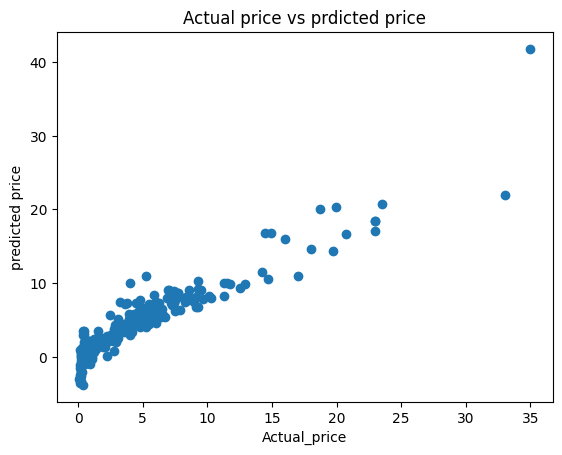

In [375]:
import matplotlib.pyplot as plt
plt.scatter(ytrain,data_pred)
plt.xlabel("Actual_price")
plt.ylabel("predicted price")
plt.title("Actual price vs prdicted price")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1, random_state=2)

In [376]:
data_pred= lr_model.predict(xtest)

In [377]:
from sklearn import metrics
error_score=metrics.r2_score(ytest, data_pred)
print("r score errror:" , error_score)

r score errror: 0.8365766715026473


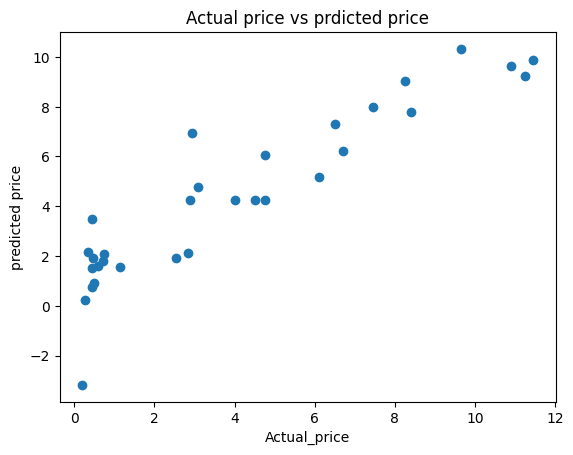

In [378]:
import matplotlib.pyplot as plt
plt.scatter(ytest,data_pred)
plt.xlabel("Actual_price")
plt.ylabel("predicted price")
plt.title("Actual price vs prdicted price")
plt.show()

In [379]:
#lasso regresioon

In [380]:
from sklearn.linear_model import Lasso
ls= Lasso()

In [381]:
ls.fit(xtrain,ytrain)

Lasso()

In [383]:
data_pred1= ls.predict(xtrain)

In [386]:
error_score = metrics.r2_score(ytrain, data_pred1)
print("r sqared error: ", error_score)

r sqared error:  0.8427856123435795


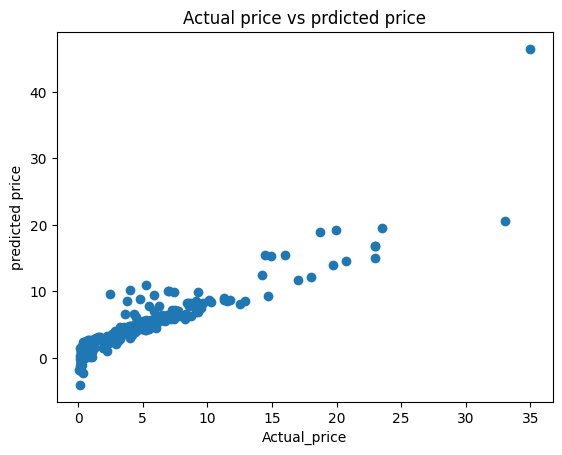

In [387]:
import matplotlib.pyplot as plt
plt.scatter(ytrain,data_pred1)
plt.xlabel("Actual_price")
plt.ylabel("predicted price")
plt.title("Actual price vs prdicted price")
plt.show()

In [388]:
ls.fit(xtest,ytest)

Lasso()

In [390]:
data_pred2=ls.predict(xtest)

In [391]:
error_score = metrics.r2_score(ytest, data_pred2)
print("r sqared error: ", error_score)

r sqared error:  0.9148157845262994


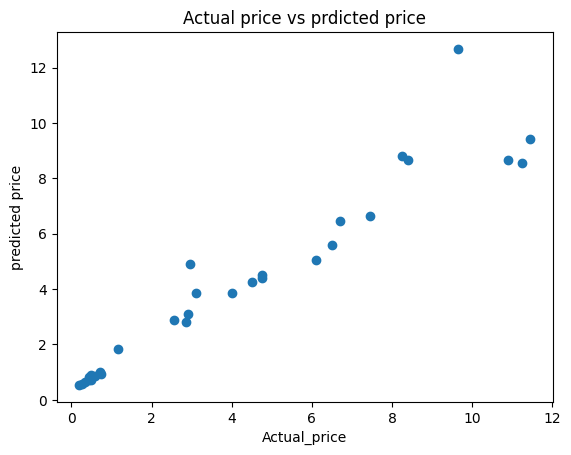

In [392]:
import matplotlib.pyplot as plt
plt.scatter(ytest,data_pred2)
plt.xlabel("Actual_price")
plt.ylabel("predicted price")
plt.title("Actual price vs prdicted price")
plt.show()